In [2]:
import numpy as np
import matplotlib.pylab as py
import pandas as pd
import scipy.stats as st
np.set_printoptions(precision=2)
%matplotlib inline

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None,
                      names=unames, engine='python')


rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None,
                        names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None,
                        names=mnames, engine='python')

data = pd.merge(pd.merge(ratings, users) , movies)

data.loc[data['age'] < 18 , 'age_interval'] = "Under 18"
data.loc[(data['age'] >= 18) & (data['age'] < 25), 'age_interval'] = "18-24"
data.loc[(data['age'] >= 25) & (data['age'] < 35), 'age_interval'] = "25-34"
data.loc[(data['age'] >= 35)  & (data['age'] < 45), 'age_interval'] = "35-44"
data.loc[(data['age'] >= 45) & (data['age'] < 50), 'age_interval'] = "45-49"
data.loc[(data['age'] >= 50) & (data['age'] < 56), 'age_interval'] = "50-55"
data.loc[data['age'] >= 56, 'age_interval'] = "56+"

Merged_hdf_datastore = pd.HDFStore('Merged_hdf_datastore_data.h5')
print Merged_hdf_datastore
Merged_hdf_datastore['data'] = data

<class 'pandas.io.pytables.HDFStore'>
File path: Merged_hdf_datastore_data.h5
/data            frame        (shape->[1000209,11])


In [19]:
#Read from hdf5 to verify
readhdf = pd.read_hdf('Merged_hdf_datastore_data.h5','data')  
print "*** Printing data from HDF5 ***"
readhdf

*** Printing data from HDF5 ***


,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_interval
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,56+
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,25-34
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,25-34
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,50-55
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama,18-24
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama,25-34
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama,25-34
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama,45-49


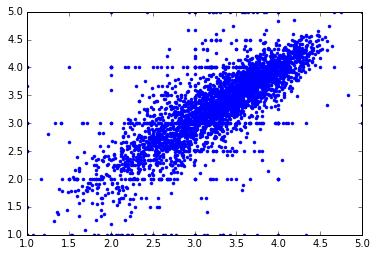

In [5]:
X=data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
py.plot(X['M'],X['F'],'.')

#Positive Linear relationship exists between Male and female ratings

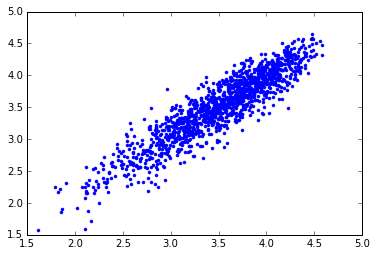

In [35]:
ratings_by_title = data.groupby('title').size()
active_titles = ratings_by_title.index[ratings_by_title > 200]
mean_ratings_grt200 = X.ix[active_titles]

py.plot(mean_ratings_grt200['M'],mean_ratings_grt200['F'],'.')

#Stronger positive Linear relationship exists between Male and female ratings on movies rated more than 200 times

In [36]:
X.corr()

#A strong uphill (positive) linear relationship

gender,F,M
gender,,
F,1.00000,0.76319
M,0.76319,1.00000


In [25]:
X=data.pivot_table('rating',index='genres',columns='gender',aggfunc='mean')
X['diff%'] = (X['M'] - X['F'])/((X['M'] + X['F'])/2)*100
sorted_by_diff = X.sort_values(by='diff%', ascending=[False])
sorted_by_diff[:10]

#From the result here we see that Females don't like Action movies in general and looks like Men are more of action,Thrill and Horror
#Movies

gender,F,M,diff%
genres,,,
Comedy|Film-Noir|Thriller,1.000000,2.250000,76.923077
Crime|Mystery,2.687500,3.360656,22.259868
Action|Animation|Children's|Sci-Fi|Thriller|War,2.857143,3.433333,18.319455
Action|Adventure|Comedy|Horror,3.297297,3.909283,16.984073
Action|Comedy|Crime|Horror|Thriller,2.735714,3.232558,16.649503
Action|Adventure|Drama|Thriller,2.956522,3.483146,16.355636
Action|Western,3.541667,4.144167,15.678196
Action|Adventure|Children's|Fantasy,1.857143,2.135135,13.926499
Action|Drama|Western,2.555556,2.932773,13.746172


In [29]:
sorted_by_diff = X.sort_values(by='diff%', ascending=[True])
sorted_by_diff[:10]
#Looks like Females like Children's movies the most with a taste of romance and Fantasy
#As a comparison looks like Men don't like to take there children to the cinema and watch a children movie, but Females are highly
#willing to do that. Men are sulfish!!

gender,F,M,diff%
genres,,,
Children's|Drama|Fantasy,3.538462,2.756410,-24.847251
Action|Comedy|Romance|Thriller,3.254717,2.578358,-23.190470
Action|Adventure|Animation|Children's|Fantasy,3.146341,2.510638,-22.475002
Adventure|Children's|Comedy|Fantasy|Romance,2.800000,2.278846,-20.522529
Children's|Fantasy,3.090909,2.562500,-18.693467
Action|Adventure|Children's|Sci-Fi,2.163636,1.820339,-17.233911
Adventure|Children's|Comedy,3.046083,2.567901,-17.035378
Children's|Comedy|Mystery,3.325301,2.805970,-16.940404
Children's|Musical,3.859504,3.286325,-16.042347


In [23]:
X=data.pivot_table('rating',index='age_interval',columns='gender',aggfunc='mean')
Y=data.pivot_table('rating',index='age_interval',columns='gender',aggfunc='count')

X['diff%'] = abs((X['M'] - X['F'])/((X['M'] + X['F'])/2))*100
sorted_by_diff = X.sort_values(by='diff%', ascending=[False])
sorted_by_diff[:10]


gender,F,M,diff%
age_interval,,,
56+,3.915534,3.720327,5.112902
50-55,3.797110,3.687098,2.939849
Under 18,3.616291,3.517461,2.770775
25-34,3.606700,3.526780,2.240699
18-24,3.453145,3.525476,2.072950
35-44,3.659653,3.604434,1.520325
45-49,3.663044,3.627942,0.962894


In [6]:
print 'The Count for each age interval gender:'

Y

The Coun for each age interval gender:


gender,F,M
age_interval,,
18-24,45427,138109
25-34,91340,304216
35-44,49473,149530
45-49,24110,59523
50-55,18064,54426
56+,9199,29581
Under 18,8827,18384


In [21]:
import re
previousName = '0'
tmp = 0
for index, row in data.iterrows():
    if previousName == row['title']:
        continue
    titleName = row['title']
    year = re.search(r"\(([0-9]+)\)", titleName).group(1)
    previousName = titleName
    try:
        if int(year) in range(1900, 1910):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1900 - 1910"
        if int(year) in range(1911, 1920):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1911 - 1920"
        if int(year) in range(1921, 1930):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1921 - 1930"
        if int(year) in range(1931, 1940):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1931 - 1940"
        if int(year) in range(1941, 1950):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1941 - 1950"
        if int(year) in range(1951, 1960):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1951 - 1960"
        if int(year) in range(1961, 1970):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1961 - 1970"
        if int(year) in range(1971, 1980):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1971 - 1980"
        if int(year) in range(1981, 1990):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1981 - 1990"
        if int(year) in range(1991, 2000):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "1991 - 2000"
        if int(year) in range(2001, 2010):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "2001 - 2010"
        if int(year) in range(2011, 2016):
            data.loc[data['title'] == titleName, 'MovieFromPeriod'] = "2011 - 2016"
    except:
        print 'Title = ' + titleName + '   Year is not numeric: ' + year
        continue
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_interval,MovieFromPeriod
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18,1971 - 1980
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,56+,1971 - 1980
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,25-34,1971 - 1980
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,25-34,1971 - 1980
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,50-55,1971 - 1980
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama,18-24,1971 - 1980
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18,1971 - 1980
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama,25-34,1971 - 1980
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama,25-34,1971 - 1980
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama,45-49,1971 - 1980


In [31]:
X=data.pivot_table('rating',index='MovieFromPeriod',columns='gender',aggfunc='mean')
Y=data.pivot_table('rating',index='MovieFromPeriod',columns='gender',aggfunc='count')


X['diff%'] = (X['M'] - X['F'])/((X['M'] + X['F'])/2)*100
sorted_by_diff = X.sort_values(by='diff%', ascending=[True])
sorted_by_diff[:15]

#What this table telling us is that the female tends to very old movies much more than the males, and throw out the years the cinema
#Industry start getting better in making movies that both male and female will like and watch. Also from this table someone can argue
#that in the old days women tends to be more of home sitting Mom's which means they had more time to spent to watch TV or cinema, so it 
#make sense that the movies at the time was womes oriented!!

gender,F,M,diff%
MovieFromPeriod,,,
1911 - 1920,3.730769,3.105263,-18.300267
1931 - 1940,4.104553,3.986119,-2.927670
1991 - 2000,3.523068,3.449191,-2.119162
1981 - 1990,3.638885,3.568461,-1.954233
1951 - 1960,4.000000,3.939620,-1.520985
1941 - 1950,4.097471,4.055318,-1.034084
1961 - 1970,3.912452,3.919010,0.167481
1921 - 1930,3.985876,4.009105,0.581090
1971 - 1980,3.803798,3.837111,0.871972


In [32]:
print 'The Count for each MovieFromPeriod gender:'

Y

The Count for each MovieFromPeriod gender:


gender,F,M
MovieFromPeriod,,
1911 - 1920,26,19
1921 - 1930,354,1318
1931 - 1940,3558,8789
1941 - 1950,4904,12166
1951 - 1960,8760,23882
1961 - 1970,10737,34276
1971 - 1980,16009,62073
1981 - 1990,46974,160843
1991 - 2000,130375,372151
